Generating plot for cams = 1.00000000
2858.3561709486103
Generating plot for cams = 5.00000000
1299.035566336651
Generating plot for cams = 9.00000000
973.951911527773
Generating plot for cams = 13.00000000
813.3624173479861
Generating plot for cams = 17.00000000
713.1754296803628
Generating plot for cams = 21.00000000
643.0265271574118


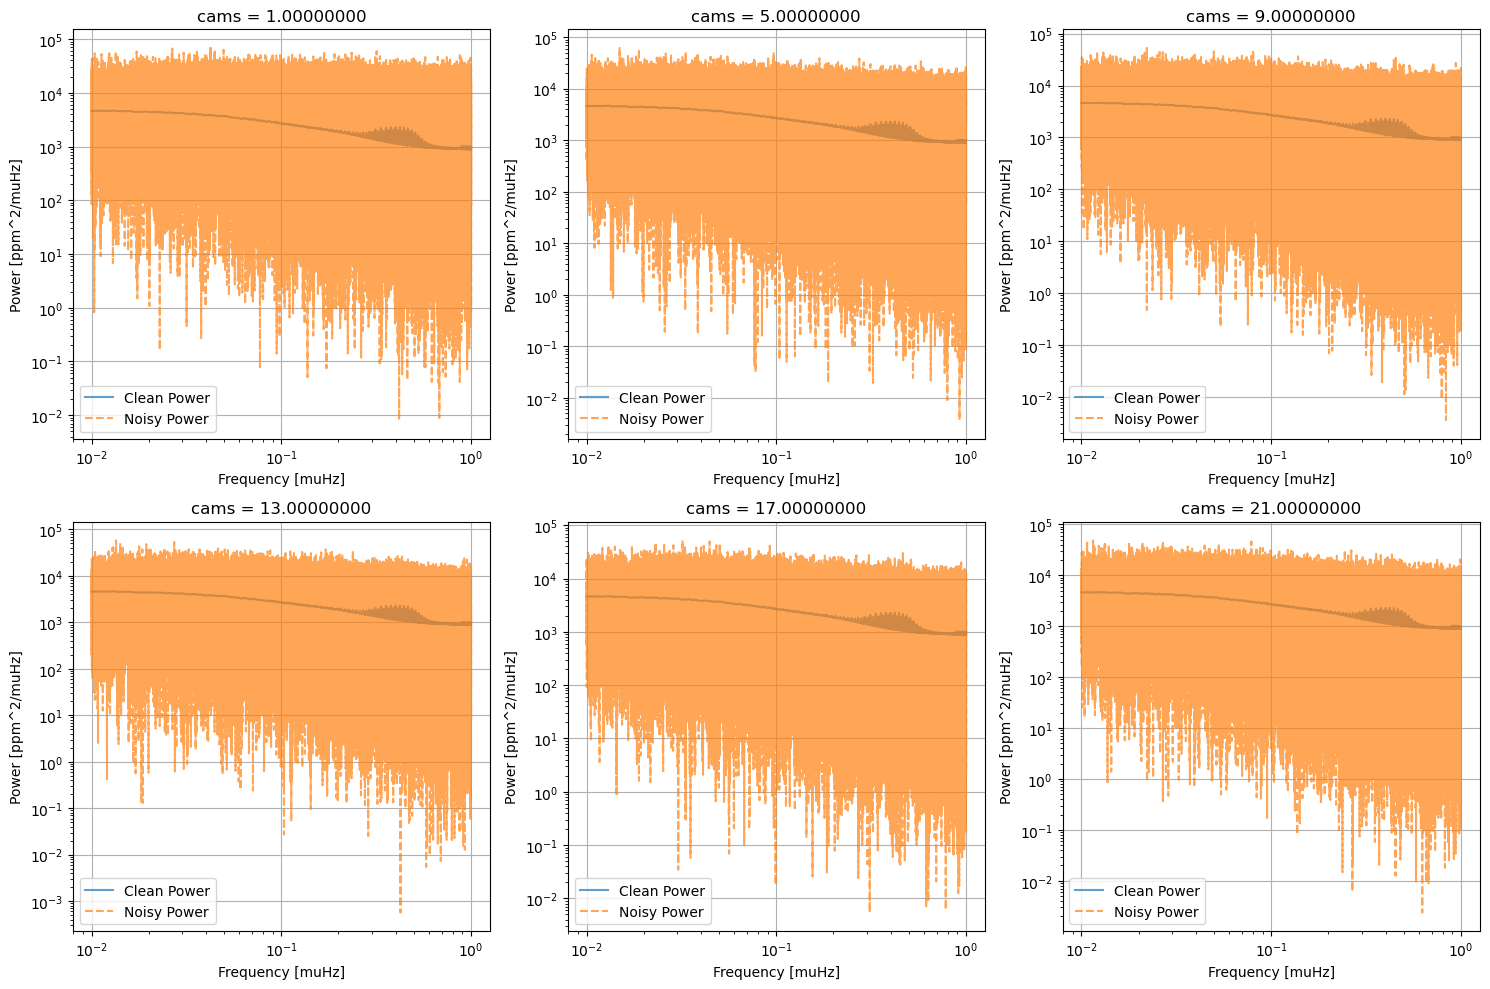

In [1]:
#ADDING NOISE AND VARYING NUMBER OF CAMERAS USING THE ABOVE SCALING RELATION (USE THIS)
import random
import math
import matplotlib.pyplot as plt
import numpy as np

filepath_t = '/Users/henry/Downloads/output.pow' #Place your own filepath here

# Define the range of sigma values
cams_values = np.arange(24, 25, 1)  #Use this to vary the number of cameras viewing the star at any one time (24 max, 6 min)

#Determine the number of rows and columns for subplots
num_plots = len(cams_values)
cols = 3  #Number of columns (adjust as needed)
rows = math.ceil(num_plots / cols)  #Calculate rows dynamically

#Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))  #Adjust figure size for better layout
axes = axes.flatten()  #Flatten the axes array for easy iteration

#Generate and plot graphs for each camera value
for i, cams in enumerate(cams_values):
    ax = axes[i]  # Get the current axis
    print(f"Generating plot for cams = {cams:.8f}")

    # Initialize empty lists to store frequency and power data
    frequencies = []
    powers = []

    # Load data from the .pow file
    with open(filepath_t, 'r') as f:
        for line in f:
            if line.startswith('#'):  # Skip comments
                continue
            parts = line.split()
            if len(parts) == 2:
                try:
                    frequencies.append(float(parts[0]))
                    powers.append(float(parts[1]))
                except ValueError:
                    continue

    # Convert lists to NumPy arrays for efficient manipulation
    frequencies = np.array(frequencies)
    powers = np.array(powers)

    vmag = 11 #PUT VMAG OF STAR IN HERE (will make automated once we have data from TSM)
    
    time = 25 #Intergration time (don't change)

    cam_scale = 408.51*cams**(-0.98) #Scaling relation equation to vary camera effect

    bgshot=cam_scale*10**(-0.4*(11.0-vmag)) #Shot noise equation
    
    rms=np.sqrt(bgshot*1.0e6/(2.0*50.0)) #Conversion to 50 second intergration time
    
    rms_at_t=rms*np.sqrt(50.0/(time)) #Conversion to defined intergration time

    powers_shot_noise = rms_at_t+powers #Total shot noise

    random_array = np.random.uniform(0, 1, size=powers.shape) #Makes a random array

    noisy_powers = -powers_shot_noise*np.log(random_array) #Adds noise
    
    file_path = f"/Users/henry/Documents/Physics/Labs/Group studies/Practice process data/cams{cams:.2f}.pow" #Where to save noisy data

    with open(file_path, "w") as file:
        file.write("# Frequency [muHz], power [ppm^2/muHz]\n")
        for freq, power in zip(frequencies, noisy_powers):
            file.write(f"{freq:.16e} {power:.16e}\n")

    #Plot on the current axis
    ax.plot(frequencies, powers, label='Clean Power', alpha=0.7)
    ax.plot(frequencies, noisy_powers, label='Noisy Power', alpha=0.7, linestyle='dashed')
    ax.set_title(f'cams = {cams:.8f}')
    ax.set_xscale('log')
    ax.set_yscale('log')
    #ax.set_xlim(1000, 10000)  # Restrict x-axis range for viewing p modes
    #ax.set_ylim(1, 100)     # Restrict y-axis range for viewing p modes
    ax.set_xlabel('Frequency [muHz]')
    ax.set_ylabel('Power [ppm^2/muHz]')
    ax.legend()
    ax.grid(True)

#Hide any unused subplots
for j in range(len(cams_values), len(axes)):
    axes[j].axis('off')

#Adjust layout
plt.tight_layout()
plt.show()